In [40]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rc
from matplotlib import gridspec
import cmath
import scipy as scipy
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from ast import literal_eval    

plt.style.use('/Users/paolostornati/Phd/phdthesis.mpltstyle')
niceblack="#262626"
from matplotlib.colors import ListedColormap
from palettable.cartocolors.sequential import DarkMint_7
import palettable
cmap = ListedColormap(DarkMint_7.mpl_colors)
colors_mint = cmap.colors
# from palettable.colorbrewer.sequential import Blues_8

cmap = ListedColormap(palettable.cmocean.sequential.Amp_20.mpl_colors)
reds = cmap.colors

cmap = ListedColormap(palettable.cmocean.diverging.Balance_14.mpl_colors)
balance14 = cmap.colors

cmap = ListedColormap(palettable.matplotlib.Inferno_20.mpl_colors)
inferno = cmap.colors



In [41]:
df=pd.read_csv ("./negative_lambda",header=None)
df.sort_values(by=[0])

df=df.transpose()

df.rename(columns=df.iloc[0], inplace = True)
df.drop([0], inplace = True)

In [42]:
df

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,1.90,1.91,1.92,1.93,1.94,1.95,1.96,1.97,1.98,1.99
1,1.832135e-07,-5.432702e-07,3.075163e-07,2.327645e-06,-8.039304e-07,1.325181e-06,-2.965434e-07,2.987285e-07,2.477915e-06,3.528039e-07,...,0.994395,0.995755,1.0,0.996889,1.0,1.0,1.0,1.0,1.0,1.0
2,5.159247e-08,-1.584963e-07,1.051793e-07,6.345432e-07,-2.263489e-07,8.805158e-08,-9.254706e-08,8.494530e-08,6.577041e-07,1.007639e-07,...,0.953893,0.964543,1.0,0.973644,1.0,1.0,1.0,1.0,1.0,1.0
3,1.171785e-07,-3.027736e-07,9.338146e-07,1.170759e-06,-5.782498e-07,7.039215e-07,-3.558515e-07,2.056700e-07,7.202380e-07,1.703988e-07,...,0.893087,0.915195,1.0,0.935154,1.0,1.0,1.0,1.0,1.0,1.0
4,1.164393e-07,-1.687980e-07,1.140435e-06,8.828382e-07,-6.779905e-07,3.831298e-07,-4.575285e-07,2.422880e-07,2.204060e-07,4.202393e-08,...,0.840195,0.867268,1.0,0.894115,1.0,1.0,1.0,1.0,1.0,1.0
5,1.080729e-07,-1.986803e-07,1.363281e-06,5.566192e-07,-8.868088e-07,8.958239e-07,-8.137578e-07,3.567087e-07,-2.940550e-07,1.669214e-07,...,0.814909,0.837150,1.0,0.862761,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,-5.165250e-07,3.651552e-08,9.105349e-08,8.050934e-07,1.208223e-06,1.037779e-07,9.098078e-07,3.587733e-07,9.662234e-08,6.541689e-08,...,0.814913,0.837146,1.0,0.862756,1.0,1.0,1.0,1.0,1.0,1.0
62,3.422152e-07,-3.595659e-08,-7.263343e-08,1.465662e-06,6.475796e-07,-5.755198e-08,1.093811e-06,2.298296e-07,4.259665e-08,-2.764324e-08,...,0.840203,0.867253,1.0,0.894112,1.0,1.0,1.0,1.0,1.0,1.0
63,7.431697e-07,6.902092e-08,2.193032e-08,1.742382e-06,1.112439e-06,1.036060e-07,1.075466e-06,2.343553e-07,1.639380e-08,-5.713585e-08,...,0.893102,0.915173,1.0,0.935155,1.0,1.0,1.0,1.0,1.0,1.0
64,7.423547e-07,6.017358e-08,4.032028e-08,1.151299e-06,1.457491e-07,4.120634e-08,4.633530e-07,4.142853e-08,1.160477e-09,-7.991525e-09,...,0.953900,0.964530,1.0,0.973647,1.0,1.0,1.0,1.0,1.0,1.0


In [43]:
import math
def truncate(number, digits) -> float:
    # Improve accuracy with floating point operations, to avoid truncate(16.4, 2) = 16.39 or truncate(-1.13, 2) = -1.12
    nbDecimals = len(str(number).split('.')[1]) 
    if nbDecimals <= digits:
        return number
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

In [44]:
for idx in df.columns:
    #print(idx)
    #plt.plot(df[truncate(idx,3)],label=r"$\mu=${}".format(truncate(idx,3)))
    print(np.sum(df[truncate(idx,3)]))


-2.901430595780428e-09
-3.4166997120443936e-08
1.1610727101984977e-08
3.426291750319166e-09
-5.133470315505619e-10
9.006462858840425e-08
1.3959346467640124e-07
1.5546982423674936e-08
1.672358590498746e-08
1.1661088428205449e-08
1.512605779518939e-08
2.7529817536730692e-08
1.4716082519239499e-08
3.859490521618259e-08
1.5208570769420525e-07
5.029379041010542e-08
4.6387295948857546e-08
2.489966738350449e-08
3.247149032992159e-08
4.189963198619748e-08
3.839026974095107e-08
3.952651955740903e-08
5.2842454023593934e-08
2.667974330350381e-08
4.3989106968123135e-08
4.4435314594526485e-08
1.4400838616035472e-07
9.359614500104032e-08
1.0000005018073372
4.2206123600507794e-06
2.9999999356043006
3.0000093241691146
3.99999544949067
4.000000001362244
4.99999943956778
4.999997759585743
4.999999950678183
5.000003084954704
5.9999924073264355
5.999999981985795
6.000000016922434
6.999999997400245
7.000000000533293
7.000000011494577
7.000000026354988
7.000000168709619
8.00000000286139
8.00000000121236
8.0

Text(0, 0.5, 'Density profile')

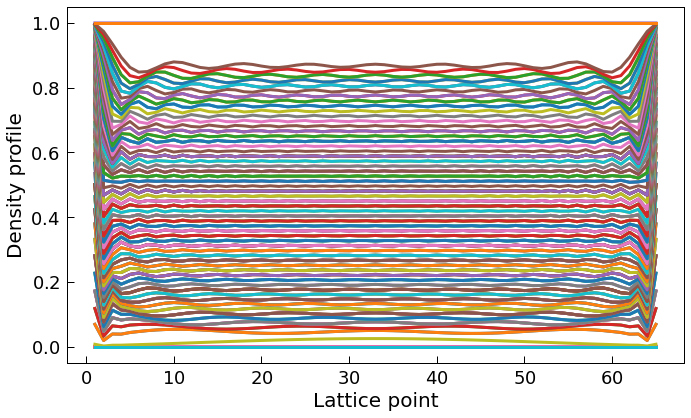

In [61]:
for idx in df.columns:
    #print(idx)
    plt.plot(df[truncate(idx,3)],label=r"$\mu=${}".format(truncate(idx,3)))
plt.xlabel("Lattice point")
plt.ylabel("Density profile")
#plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",mode="expand", borderaxespad=0, ncol=7,prop={"size":12})

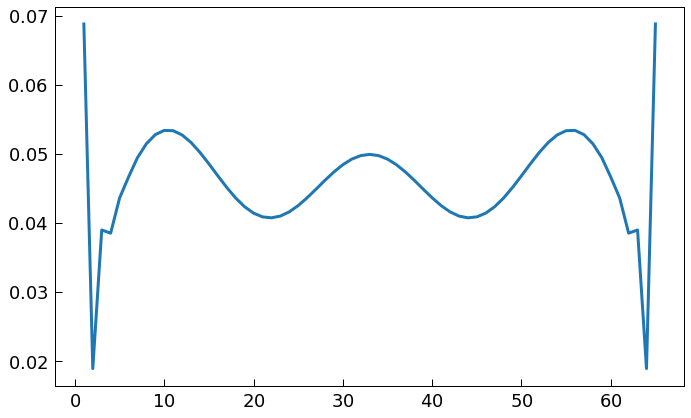

In [46]:
plt.plot(df[truncate(0.3,3)],label=r"$\mu=${}".format(truncate(0.4,3)))

In [47]:
np.size(df.columns)

192

In [48]:
w_x=np.zeros(np.size(df.columns))
for idx in np.arange(0,200,1):
    w_x[idx]=np.sum(df[df.columns[idx]])

IndexError: index 192 is out of bounds for axis 0 with size 192

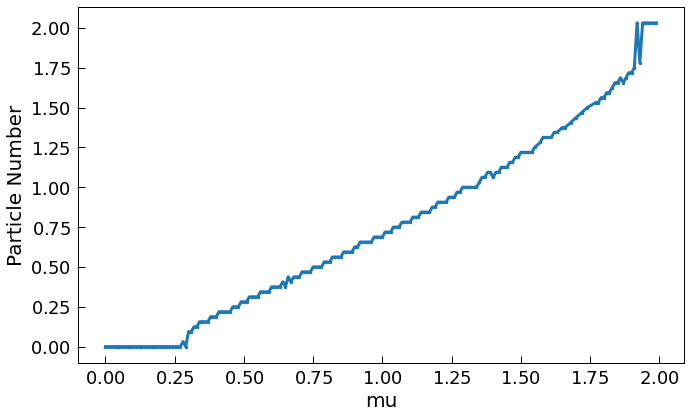

In [49]:
plt.xlabel("mu")
plt.ylabel("Particle Number")
plt.plot(df.columns,w_x/32,marker=".")

In [50]:
w_x[-2]/32

2.0312499917097435

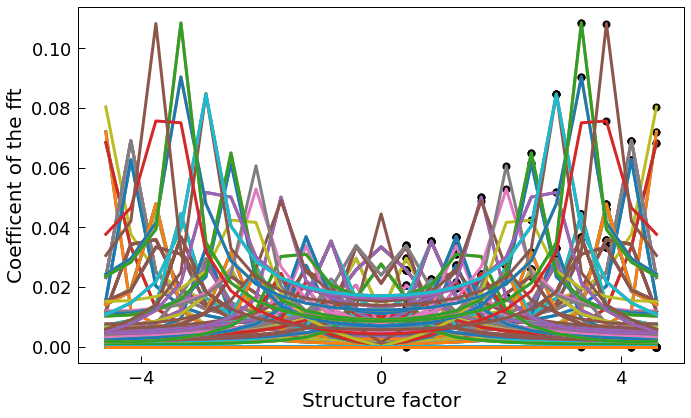

In [51]:
index_mu=[]
x_max=[]

for idx in df.columns:
    signal=df[idx][4:28]
    x=np.fft.fftshift(np.fft.fftfreq(len(signal),0.1),)[1:]
    y=np.abs(np.fft.fft(signal)[1:])
    max_y=np.max(y[x>0])
    X_positive=x[x>0]
    Y_positive=y[x>0]
    #print(X_positive[Y_positive==max_y])
    plt.xlabel("Structure factor")
    plt.ylabel("Coefficent of the fft")
    
    #plt.plot(np.fft.fftshift(np.fft.fftfreq(len(signal),0.1),)[1:], np.abs(np.fft.fft(signal)[1:]))
    #if np.asarray(y).flatten()[0]< 0.8:
    plt.plot(x,y)
    plt.scatter(X_positive[Y_positive==max_y],max_y,marker="o",color="k")
    index_mu.append(idx)
    x_max.append(X_positive[Y_positive==max_y])
    #plt.savefig('/Users/paolostornati/Phd/SquareIce/02_DMRG/L_64/peak_struct_analysis.png')

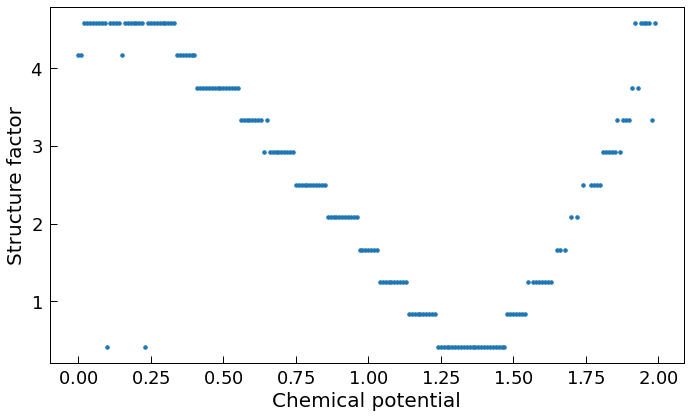

In [52]:
plt.scatter(index_mu,x_max,marker=".")

plt.xlabel("Chemical potential")
plt.ylabel("Structure factor")

xdata=np.asarray(index_mu).flatten()
ydata=np.asarray(x_max).flatten()

arr1inds = xdata.argsort()
xdata = xdata[arr1inds[::-1]]
ydata = ydata[arr1inds[::-1]]